In [30]:
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xarray as xr
from mmctools.plotting import plot_timehistory_at_height

# Compare heat fluxes from b1- and c1-level data
* eddy correlation flux measurement system (`30ECOR`)
> Atmospheric Radiation Measurement (ARM) user facility. 2003, updated hourly. Eddy Correlation Flux Measurement System (30ECOR). 2018-06-03 to 2018-06-27, Southern Great Plains (SGP) Lamont, OK (Extended, secondary) (E14). Compiled by R. Sullivan, D. Cook and E. Keeler. ARM Data Center. Data set accessed 2020-09-04 at http://dx.doi.org/10.5439/1025039.
* quality controlled eddy correlation flux measurement (`30QCECOR`)
> Atmospheric Radiation Measurement (ARM) user facility. 2003, updated hourly. Quality Controlled Eddy Correlation Flux Measurement (30QCECOR). 2018-06-03 to 2018-06-27, Southern Great Plains (SGP) Lamont, OK (Extended, secondary) (E14). Compiled by S. Xie and D. Cook. ARM Data Center. Data set accessed 2020-09-08 at http://dx.doi.org/10.5439/1097546.

See report `DOE/SC-ARM-TR-223`, "The QCECOR Value-Added Product: Quality-Controlled Eddy Correlation Flux Measurements" (https://www.arm.gov/publications/tech_reports/doe-sc-arm-tr-223.pdf)
* correlation between air and sonic (speed-of-sound) temperatures is not 1:1, leading to underestimation of the sensible heat flux (http://www.arm.gov/publications/tech_reports/handbooks/ecor_handbook.pdf)

In [27]:
startdate = '2018-06-03'
enddate = '2018-06-26'

In [6]:
ecorfiles = glob.glob('/Users/equon/OneDrive - NREL/AWAKEN/ARM/30ecor/sgp30ecorE14.b1.*.cdf')
ecor = xr.open_mfdataset(ecorfiles)

In [14]:
# note: level "s1" (summary) is subset of "c1" with known bad values removed 
qcecorfiles = glob.glob('/Users/equon/OneDrive - NREL/AWAKEN/ARM/30qcecor/sgp30qcecorE14.s1.*.nc')
qcecor = xr.open_mfdataset(qcecorfiles)

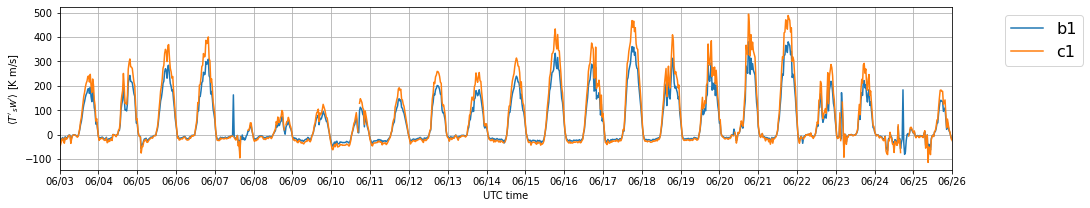

In [55]:
plotdata = {
    'b1': (ecor['rho']*1004*ecor['cvar_rot_wt']).rename('H'),
    'c1': qcecor['sensible_heat_flux'].rename('H'), 
}

fig,ax = plot_timehistory_at_height(
    plotdata,
    fieldlabels={
        'H': r"$\langle T'_s w' \rangle$ [K m/s]",
    },
    timelimits=(startdate,enddate),
    subfigsize=(16,3),
)
ax.set_xticks([], minor=True)
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))